# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# открываем датасеты
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
# сбрасываем ограничения на количестов выодимых рядов и столбцов
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# напишем функцию для проведения первичного анализа
def base_analysis(df):
    print('Первые 5 строк датасета:')
    display(df.head())
    print('\n', 'Общая информация:','\n')
    print(df.info())
    print('\n','Cтатистическое описание:')
    display(df.describe())
    print('\n','Количество явных дубликатов:')
    print(df.duplicated().sum())
    print('\n','Количество пропусков:')
    print(df.isnull().sum())
    print('\n', 'Доля пропусков:')
    print(df.isna().mean()*100)

    plt.figure(figsize=(24,12))
    corr_matrix = sns.heatmap(df.corr())
    corr_matrix.axes.set_title("Корреляционная матрица", fontsize=14)

### Первичный анализ данных

### Исходные данные

Первые 5 строк датасета:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


 Общая информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438


 Количество явных дубликатов:
0

 Количество пропусков:
date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116

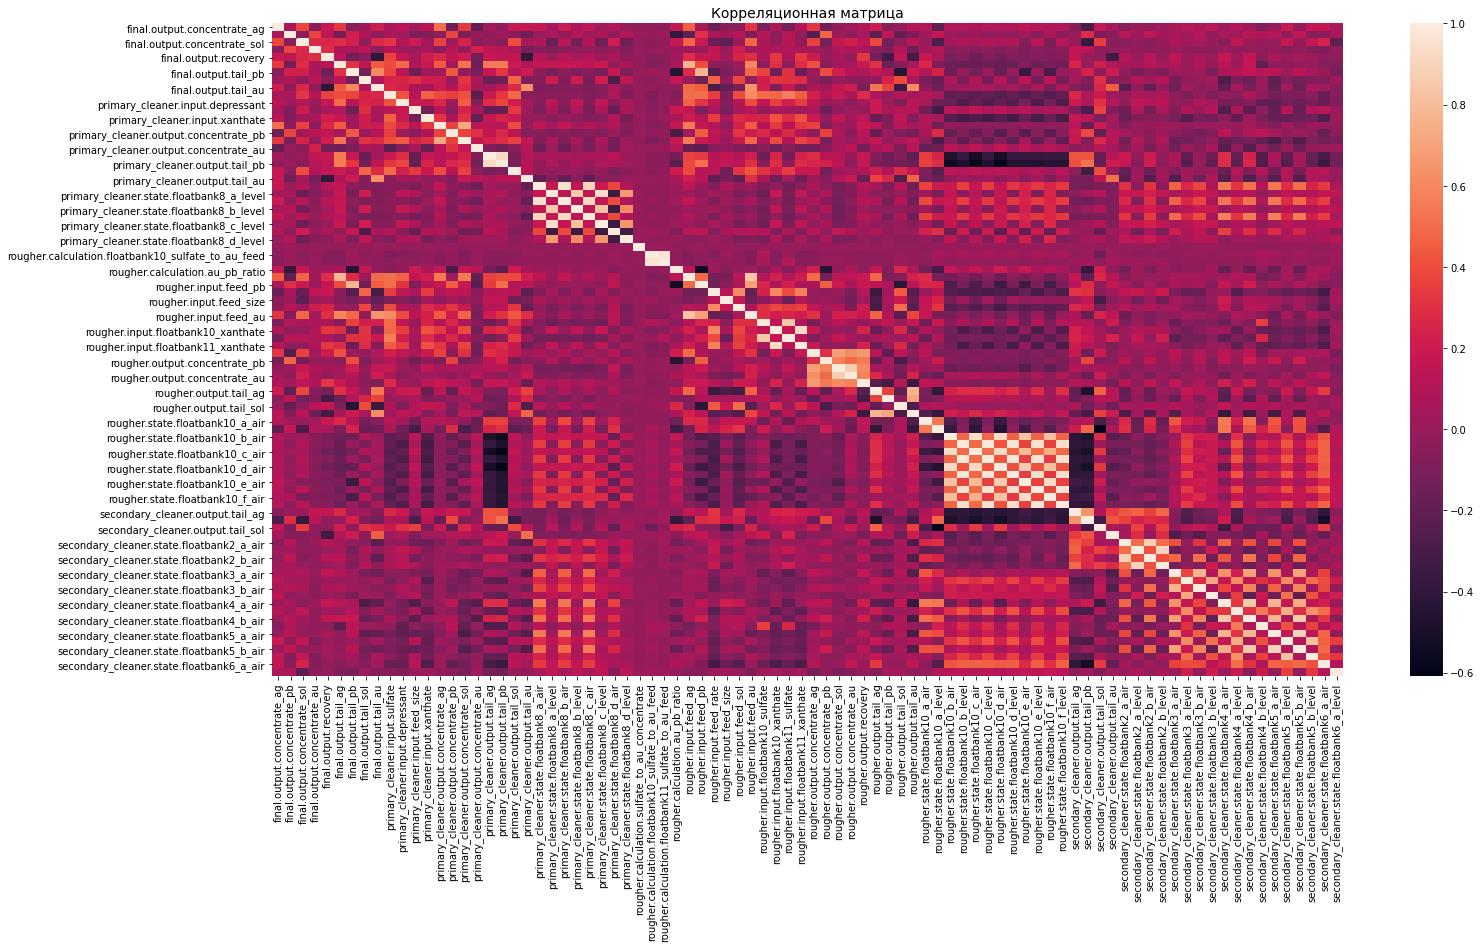

In [5]:
# смотрим на первичные показатели исходных данных
base_analysis(df_full)

In [6]:
# изменим формат даты на тип date
df_full['date'] = pd.to_datetime(df_full['date'])

* Можно заметить, что наблюдается сильная корреляция между некоторыми признакми.

### Обучающая выборка

Первые 5 строк датасета:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


 Общая информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148


 Количество явных дубликатов:
0

 Количество пропусков:
date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86

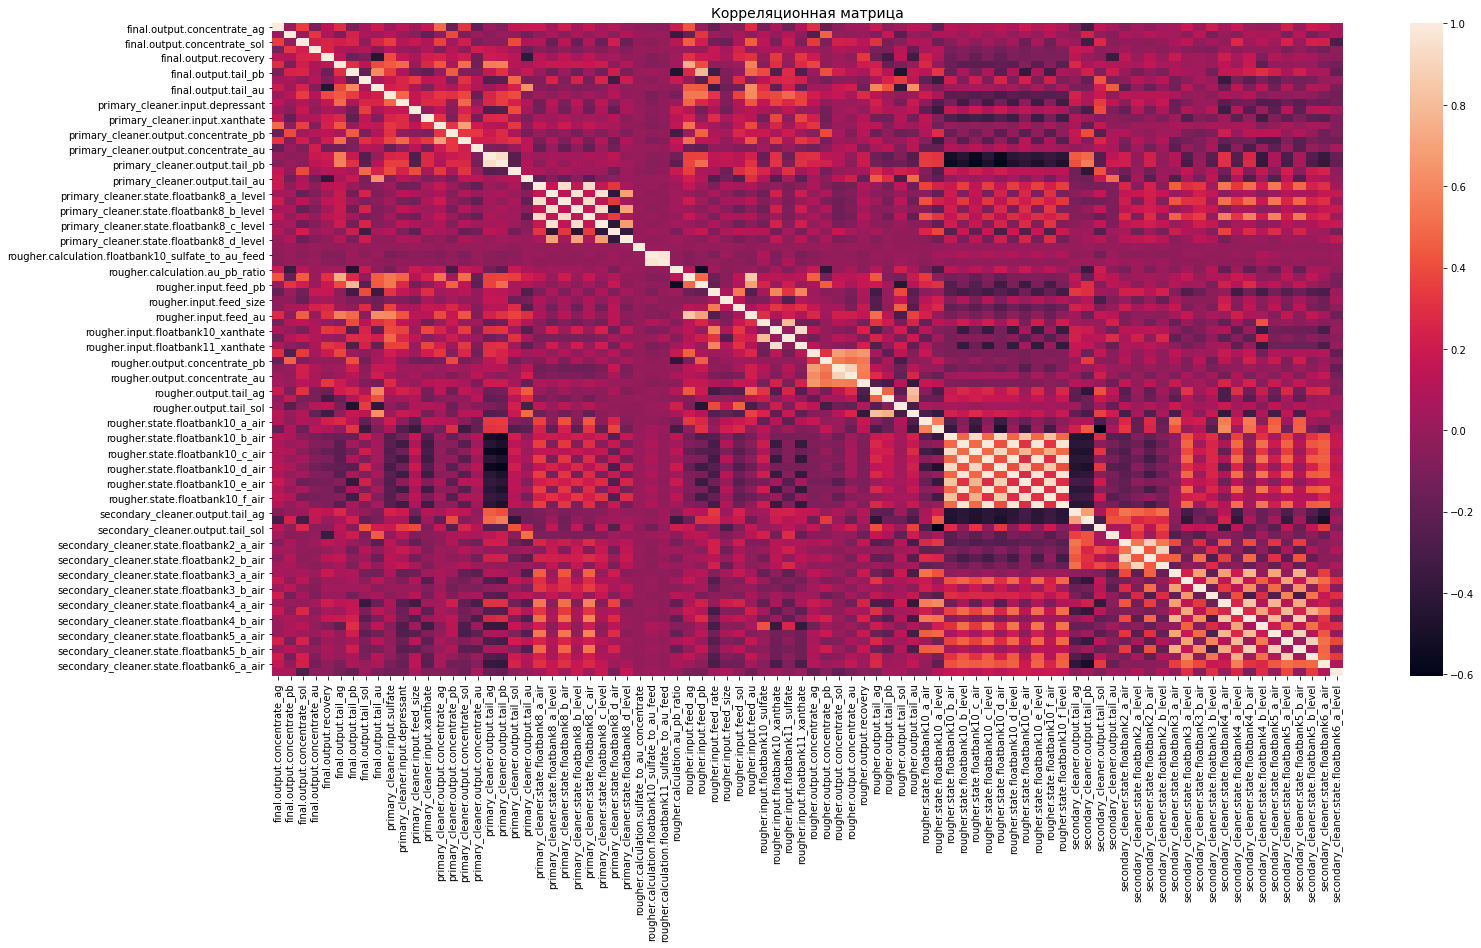

In [7]:
# смторим на первичные показатели обучающей выборки
base_analysis(df_train)

In [8]:
# изменим формат даты
df_train['date'] = pd.to_datetime(df_train['date'])

### Тестовая выборка

Первые 5 строк датасета:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50


 Общая информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   flo

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20


 Количество явных дубликатов:
0

 Количество пропусков:
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.inpu

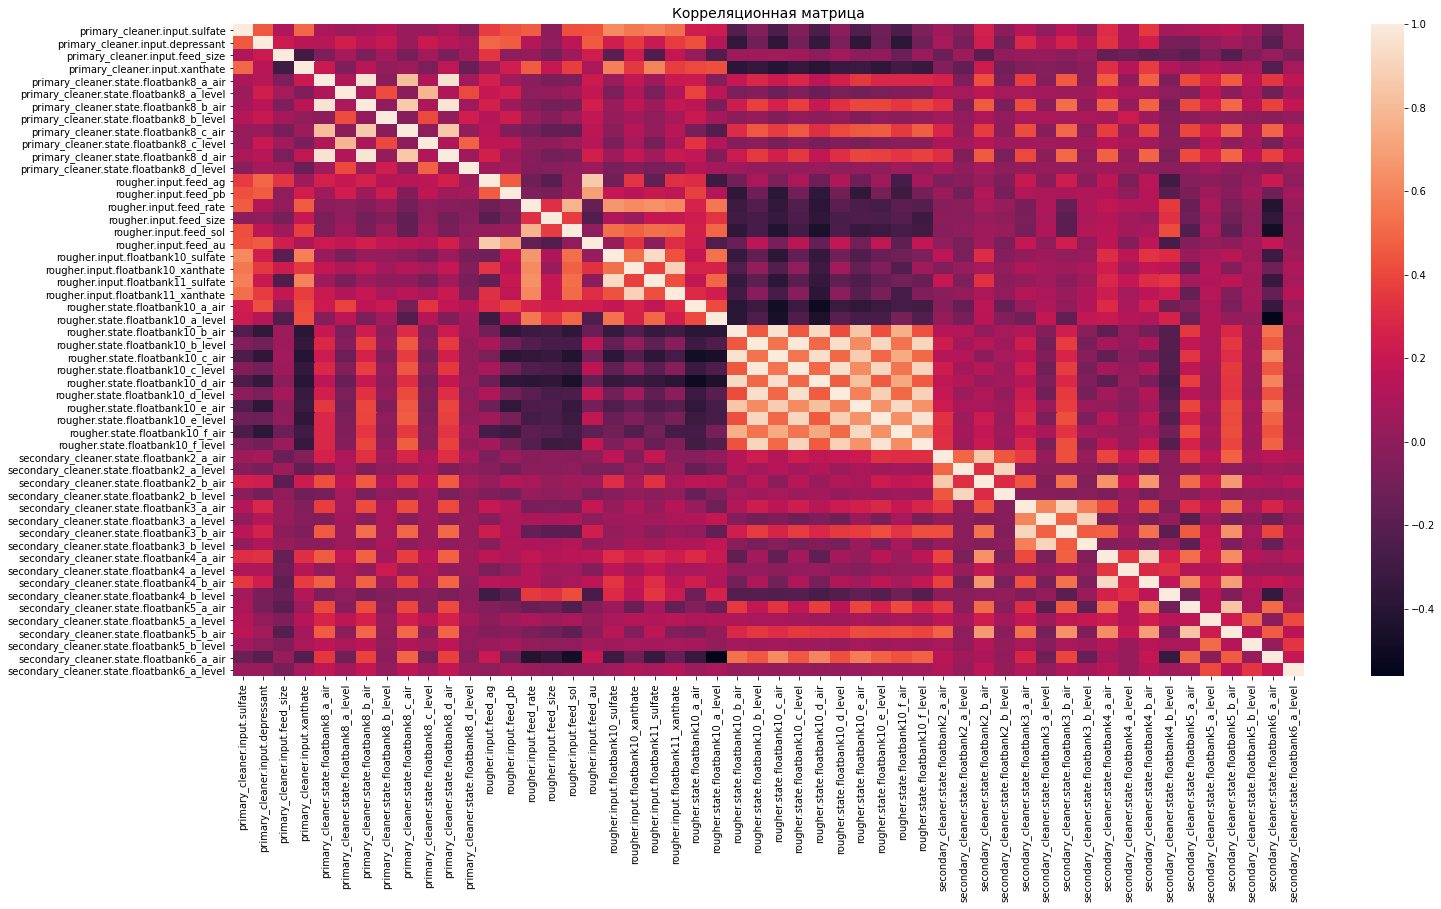

In [9]:
# смторим на первичные показатели тестовой выборки
base_analysis(df_test)

In [10]:
# изменим формат даты
df_test['date'] = pd.to_datetime(df_test['date'])

### Рассчет эффективности

In [11]:
C = df_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = df_train['rougher.input.feed_au'] # доля золота в сырье/концентрате по флотации/очистки
T = df_train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

In [12]:
# формула рассчета эффективности обогащения 
recovery = (C*(F-T))/(F*(C-T))*100
print("Средняя эффективность обогащения", round(recovery.mean(),2))
print("MAE", mean_absolute_error(df_train['rougher.output.recovery'], recovery))

Средняя эффективность обогащения 82.7
MAE 9.73512347450521e-15


* Значение MAE выдает крайне низкий показаль, что может следствовать о правильно произведенных расчетах.
* Далее посмотрим на признаки, которых нет в тестовой выборке.

### Сравнение выборок

In [13]:
train_columns = df_train.columns
test_columns = df_test.columns

unique_columns = train_columns.difference(test_columns)
unique_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

* Видим, что нет колонок с параметрами полученного продукта (целевой признак) и расчётными характеристиками (как сказано в условии, эти параметры расчитываются позже)

### Переработка

In [14]:
# напишем цикл, который:
# заполнит пропуски соседними значениями (из условия знаем, что они должны быть схожи)
# остальные пропуски удалит, т.к. их доля незначительна
# приведет названия колонок к змеиному регистру

for df in df_train, df_test:
    df.ffill(axis=0, inplace=True, limit=5)
    df.dropna(inplace=True)
    df.columns = df.columns.str.replace('.', '_', regex=True)

In [15]:
df_full.columns = df_full.columns.str.replace('.', '_', regex=True)

**Вывод**

* Мы провели первичный анализ датасетов, в которых обнаружили корреляции, а также заполнили пропуски.
* Обнаружили несоответстиве количества столбцов в выборках.
* Убедились, что эффективность обогащения рассчитана правильно.
* Привели датасеты к змеиному регистру.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [16]:
def show_concentrate_of_metal (metal, name):
    plt.figure(figsize=(15,5), dpi=80)
    
    sns.kdeplot(df_full[f'rougher_input_feed_{metal}'], shade=True, label="Исходное сырье")
    sns.kdeplot(df_full[f'rougher_output_concentrate_{metal}'], shade=True, label="Флотация")
    sns.kdeplot(df_full[f'primary_cleaner_output_concentrate_{metal}'], shade=True, label="Первичная очистка")
    sns.kdeplot(df_full[f'final_output_concentrate_{metal}'], shade=True, label="Финальная очистка")
    
    plt.title(f'Концентрация {name} на различных этапах очистки', fontsize=22)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()

#### Золото

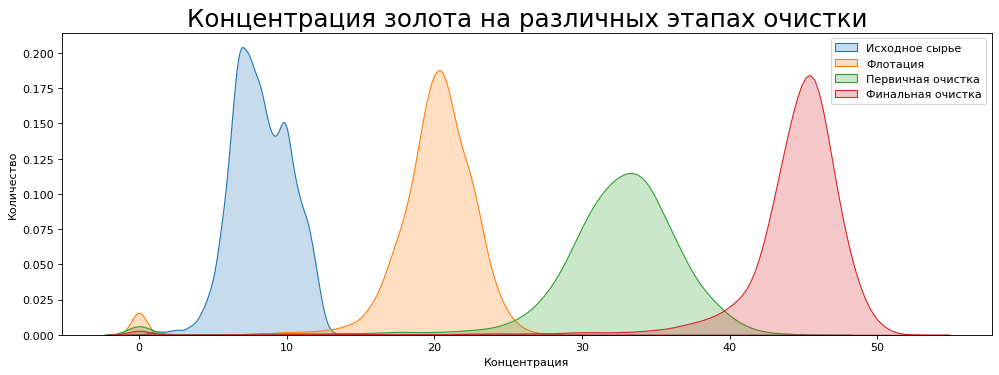

In [17]:
show_concentrate_of_metal('au', 'золота');

* Можно заметить сильное увеличение концентрации сырья после всех этапов очистки с минимальными потерями в объеме.

#### Серебро

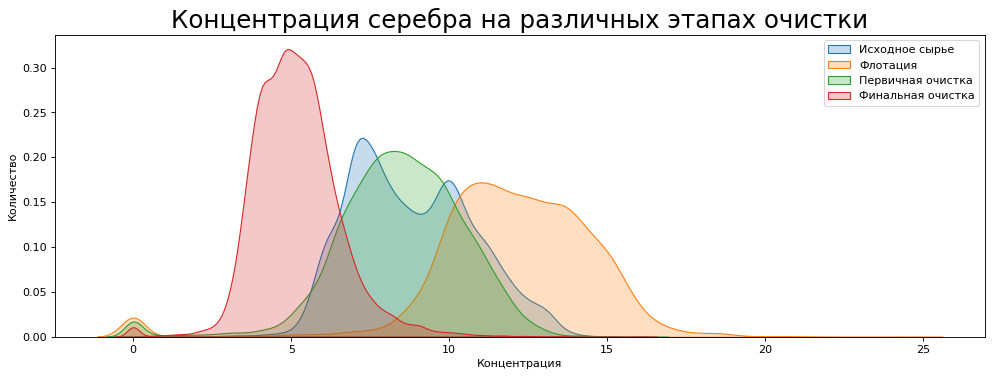

In [18]:
show_concentrate_of_metal('ag', 'серебра');

* В случае с серебром, его концентрация сильно снижается на финальной стадии

#### Свинец

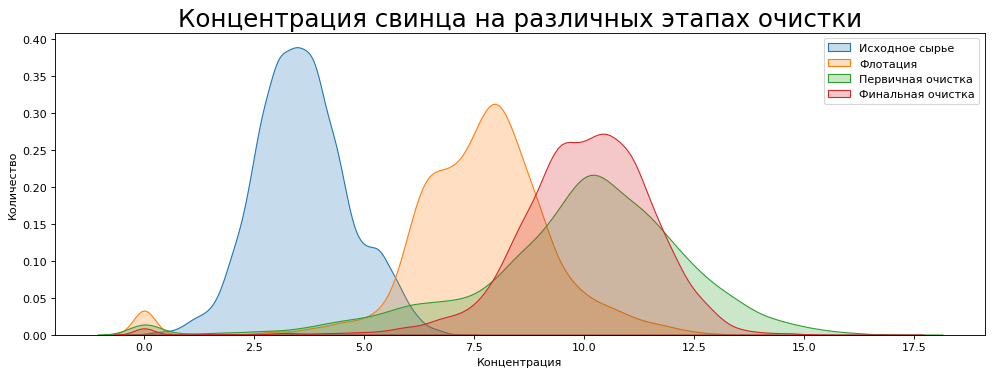

In [19]:
show_concentrate_of_metal('pb', 'свинца');

* Концентрация свинца увеличивается в течение всей отчистки.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

In [20]:
def show_feed_size (step, name):
    plt.figure(figsize=(10,5), dpi=80)
    
    sns.kdeplot(df_train[f'{step}_feed_size'], shade=True, label = 'Обучающая выборка')
    sns.kdeplot(df_test[f'{step}_feed_size'], shade=True, label = 'Тестовая выборка')

    plt.title(f'Распределения размеров гранул {name} сырья на выборках', fontsize=15)
    plt.xlabel('Размеры гранул сырья')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()

#### Распределение размеров исходного сырья

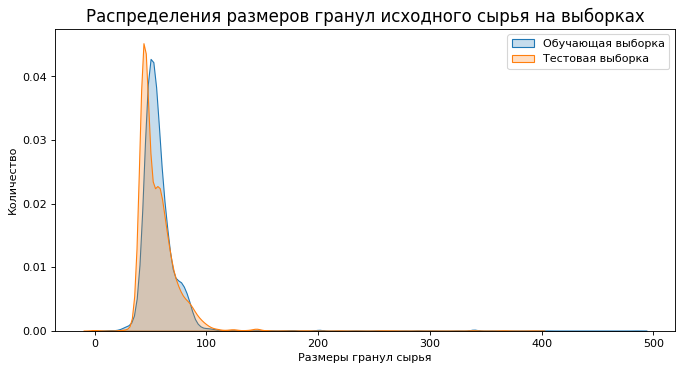

In [21]:
show_feed_size('rougher_input', 'исходного')

#### Распределение размеров сырья после обработки

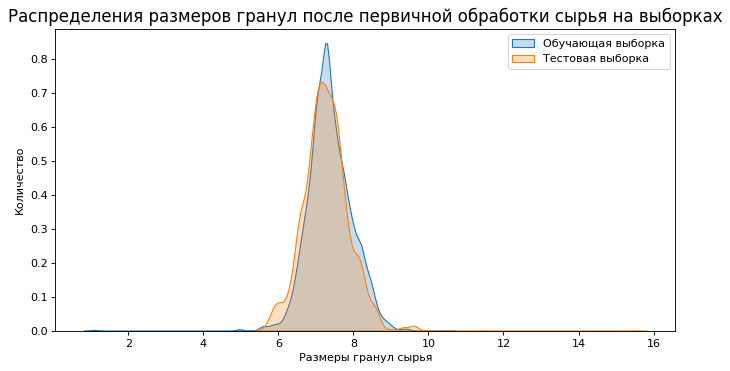

In [22]:
show_feed_size('primary_cleaner_input', 'после первичной обработки')

* Распределение размеров гранул на графиках примерно одинакова.

### Суммарная концентрация веществ на разных стадиях

In [23]:
total_stages = ['final_output_concentrate', 'primary_cleaner_output_concentrate', 
                'rougher_output_concentrate', 'rougher_input_feed']

for df in df_full, df_train:
    for stage in total_stages:
            df[f'{stage}_total'] = df[f'{stage}_ag'] + df[f'{stage}_pb'] + df[f'{stage}_au'] + df[f'{stage}_sol']

In [24]:
df_test['rougher_input_feed_total'] = (df_test['rougher_input_feed_ag'] + df_test['rougher_input_feed_pb'] +
                                   df_test['rougher_input_feed_au'] + df_test['rougher_input_feed_sol'])

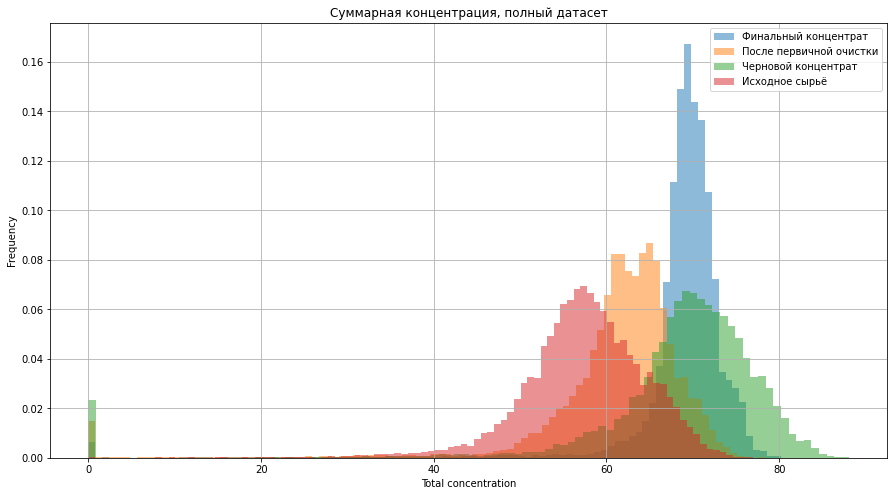

In [25]:
plt.figure(figsize=(15,8));
plt.hist(df_full['final_output_concentrate_total'], alpha=0.5, bins=100, label='Финальный концентрат', density=True)
plt.hist(df_full['primary_cleaner_output_concentrate_total'], alpha=0.5, bins=100, label='После первичной очистки', density=True)
plt.hist(df_full['rougher_output_concentrate_total'], alpha=0.5, bins=100, label='Черновой концентрат', density=True)
plt.hist(df_full['rougher_input_feed_total'], alpha=0.5, bins=100, label='Исходное сырьё', density=True)


plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Total concentration')
plt.legend(loc='upper right')
plt.title('Суммарная концентрация, полный датасет');

* Можно заметить, концентрация распределяется от 40 до 85, где в финальном концентрате повышается количественный показатель.
* Также мы видим нулевые значения концентрации, которые стоит удалить. 

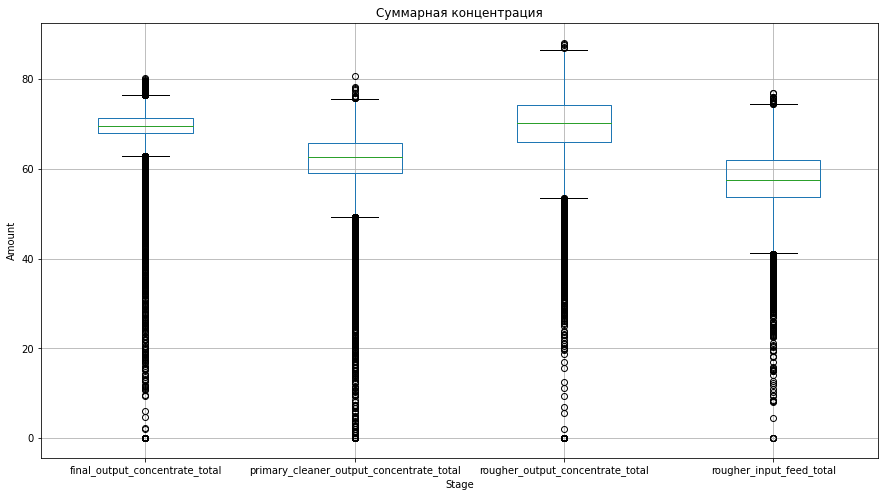

In [26]:
# для определения диапазона посмотрим на boxplot
plt.figure(figsize=(15,8))
total_cols = ['final_output_concentrate_total', 'primary_cleaner_output_concentrate_total',
              'rougher_output_concentrate_total', 'rougher_input_feed_total']

df_full.boxplot(total_cols)


plt.grid(True)
plt.ylabel('Amount')
plt.xlabel('Stage')
plt.title('Суммарная концентрация');

* В данных есть хвосты, очистим их методом межквантильного размаха. Часть колонок отсутствует в тестовой выборке, поэтому проведем расчеты отдельно для двух выборок. Полные данные чистить не будем.

In [27]:
# чистим обучающую выборку
total_stages = ['final_output_concentrate_total', 'primary_cleaner_output_concentrate_total', 
                'rougher_output_concentrate_total', 'rougher_input_feed_total']

for stage in total_stages:

    q75 = np.percentile(df_train.loc[:,stage], 75)
    q25 = np.percentile(df_train.loc[:,stage], 25)
    intr_qr = q75 - q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_train.loc[df_train[stage] < min,stage] = np.nan
    df_train.loc[df_train[stage] > max,stage] = np.nan

df_train = df_train.dropna()

In [28]:
# чистим тестовую выборку
q75 = np.percentile(df_test.loc[:,'rougher_input_feed_total'], 75)
q25 = np.percentile(df_test.loc[:,'rougher_input_feed_total'], 25)
intr_qr = q75 - q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_test.loc[df_test['rougher_input_feed_total'] < min,'rougher_input_feed_total'] = np.nan
df_test.loc[df_test['rougher_input_feed_total'] > max,'rougher_input_feed_total'] = np.nan

df_test = df_test.dropna()

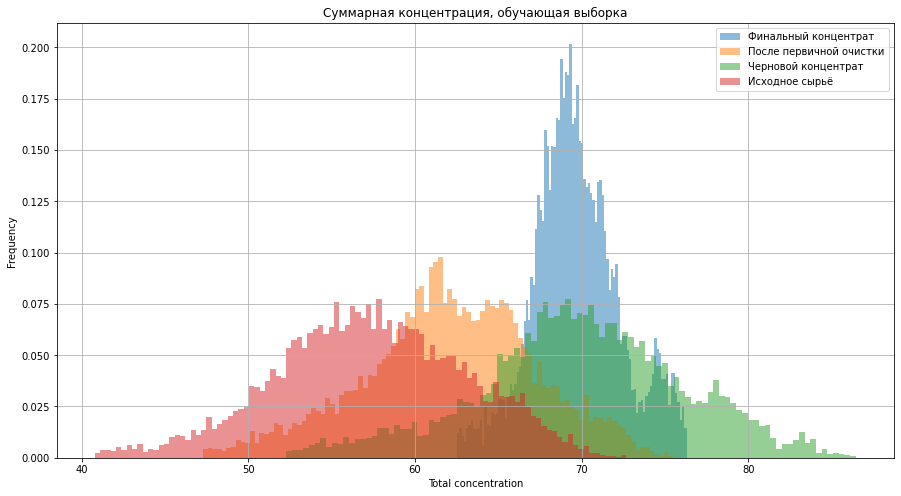

In [29]:
# делаем проверку
plt.figure(figsize=(15,8))
plt.hist(df_train['final_output_concentrate_total'], alpha=0.5, bins=100, label='Финальный концентрат', density=True)
plt.hist(df_train['primary_cleaner_output_concentrate_total'], alpha=0.5, bins=100, label='После первичной очистки', density=True)
plt.hist(df_train['rougher_output_concentrate_total'], alpha=0.5, bins=100, label='Черновой концентрат', density=True)
plt.hist(df_train['rougher_input_feed_total'], alpha=0.5, bins=100, label='Исходное сырьё', density=True)


plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Total concentration')
plt.legend(loc='upper right')
plt.title('Суммарная концентрация, обучающая выборка');

* Данные выглядят намного лучше, в которых нет нулевых значнений, повлеяющих на результаты модели.

**Вывод**

* Мы рассмотрели концентрацию металлов на разных этапах очистки, сделав соответствующие выводы
* Проверили распределение размеров гранул на выборках и убедились, что они примерно одинаковы.
* Рассмотрели концентрацию веществ и избавились от аномальных данных.

## Модель

### Подготовка

In [30]:
# выделим целевые признаки и фичи:
features_test = df_test.drop('date', axis=1)
features_train = df_train.loc[:, list(features_test.columns)]

target_r = df_train['rougher_output_recovery']
target_f = df_train['final_output_recovery']

In [34]:
features_train.shape, features_test.shape

((10356, 53), (5180, 53))

In [31]:
# масштабируем данные
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)

In [32]:
# зададим функции для расчета sMAPE
def pre_smape(target, prediction):
    numerator = abs(target - prediction)
    denominator = (abs(target) + abs(prediction)) / 2
    pre_smape = 1 / len(target) * sum(numerator/denominator) * -100 
    return pre_smape

def final_smape(smape_r, smape_f):
    smape = 0.25 * smape_r + 0.75 * smape_f
    return smape

In [33]:
# создадим функцию для оценки качества моделей
scorer = make_scorer(pre_smape, greater_is_better=False)

### Подбираем модели

#### Линейная регрессия

In [35]:
model = LinearRegression()
scores_r = cross_val_score(model, features_train_scaled, target_r, cv=5, scoring=scorer).mean() 
scores_f = cross_val_score(model, features_train_scaled, target_f, cv=5, scoring=scorer).mean() 

smape = final_smape(scores_r, scores_f) 
print(f'Отклонение составило {smape:.1f}%')

Отклонение составило 9.4%


#### Случайный лес

In [43]:
random_state = 0
n_jobs = -1
verbose = 1
model = RandomForestRegressor()
params = {
    'n_estimators':range(1,51,5),
    'max_depth':range(1,21,2),
    'random_state': [random_state],
    'n_jobs': [n_jobs],
    'verbose': [verbose]
}

In [44]:
%%time

grid_r = GridSearchCV(model, param_grid=params, scoring=scorer, cv=5).fit(features_train_scaled, target_r)

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | el

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | ela

[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Use

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | 

[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fi

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend Thread

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | ela

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBacken

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend Threadin

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packa

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are depreca

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.1s finished
C:\Users

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | ela

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBacken

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.7s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are depreca

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | ela

Wall time: 7min 46s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [45]:
grid_r.best_params_

{'max_depth': 17,
 'n_estimators': 1,
 'n_jobs': -1,
 'random_state': 0,
 'verbose': 1}

In [46]:
%%time

grid_f = GridSearchCV(model, param_grid=params, scoring=scorer, cv=5).fit(features_train_scaled, target_f)

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | el

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | ela

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  46 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBa

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are depreca

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\

[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use p

[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\U

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBa

[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | el

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | ela

[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished
C:\U

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBa

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  41 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend Threadi

[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
C:\U

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.6s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBacken

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.8s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.1s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 out of  46 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.9s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend 

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are depreca

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.4s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  31 out of  31 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | ela

C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 out of  41 | elapsed:    0.0s finished
C:\Users\permy\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | ela

Wall time: 8min 2s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


!!!! Расчеты производились локально для ускорения процесса, в противном случае это заняло бы очень много времени. В любом случае данные не повлияли на общий результат !!!

In [47]:
grid_f.best_params_

{'max_depth': 19,
 'n_estimators': 1,
 'n_jobs': -1,
 'random_state': 0,
 'verbose': 1}

In [48]:
scores_r = grid_r.best_score_ 
scores_f = grid_f.best_score_ 

smape = final_smape(scores_r, scores_f)
print(f'Отклонение составило {smape:.1f}%')

Отклонение составило 11.8%


* По результатам подборов, линейная регрессия лучший результат.

### Тестирование модели

In [36]:
target_test_r = df_full[df_full['date'].isin(df_test['date'])]['rougher_output_recovery']
target_test_f = df_full[df_full['date'].isin(df_test['date'])]['final_output_recovery']
features_test_scaled = scaler.transform(features_test)

In [37]:
model_r = LinearRegression()
model_f = LinearRegression()

model_r.fit(features_train_scaled, target_r)
model_f.fit(features_train_scaled, target_f)

prediction_r = model_r.predict(features_test_scaled)
prediction_f = model_f.predict(features_test_scaled)

In [38]:
pre_smape_r = pre_smape(target_test_r, prediction_r)
pre_smape_f = pre_smape(target_test_f, prediction_f)

smape = final_smape(pre_smape_r, pre_smape_f) * -1
print(f'Отклонение составило {smape:.1f}%')

Отклонение составило 8.7%


**Вывод**

* Тестирование модели дало схожий результат, что и тренировочная выборка.

### Проверка на адекватность 

In [41]:
# проверим модель на фиктивном регрессоре
dummy_r = DummyRegressor()
dummy_f = DummyRegressor()

dummy_r.fit(features_train_scaled, target_r)
dummy_f.fit(features_train_scaled, target_f)

dummy_pred_r = dummy_r.predict(features_test_scaled)
#dummy_pred_f = dummy_r.predict(features_test_scaled)  # ОПИСКА ТУТ)
dummy_pred_f = dummy_f.predict(features_test_scaled)

In [42]:
pre_smape_dummy_r = pre_smape(target_test_r, dummy_pred_r)
pre_smape_dummy_f = pre_smape(target_test_f, dummy_pred_f)

smape = final_smape(pre_smape_dummy_r, pre_smape_dummy_f) * -1
print(f'Отклонение составило {smape:.1f}%')

Отклонение составило 9.2%


* Результаты намного лучше фиктивного регрессора, поэтому можно смело сказать, что наша модель прошла проверку.

**Вывод**

* Мы выбрали и обучили оптимальную модель для нашей задачи.
* Проверили модель на тестовой выборке и сравнили с результатами фиктивной модели, убедившись в ее эффективности.

## Общий вывод

По итогу проекта было сделано следующее:

* Провели первичный анализ датасетов и изучили технологические принципы добычи золота.
* Проверили корректность расчёта эффективности обогащения.
* Выявили признаки, недоступные в тестовой выборке.
* Провели переработку данных: удалили колонки с высокой корреляцией, заполнили пропуски.
* Выяснили, что концентрация золота и свинца на каждом последующем этапе возрастает, а серебра - уменьшается.
* Убедились, что размеры гранул сырья на тестовой и обучающей выборках распределены равномерно.
* Посмотрели на суммарную концентрацию веществ на каждом этапе и избавились от аномальных значений.
* Обучили несколько моделей для поиска подходящей.
* По итогу тестирования был достигнут приемлимый показатель sMAPE, что на порядок выше значений фиктивного регрессора.